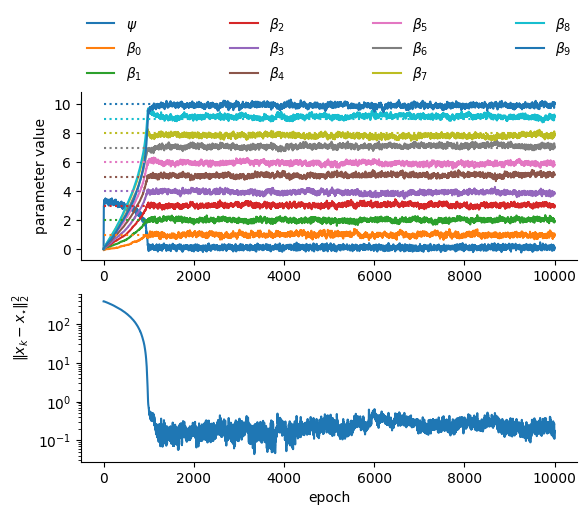

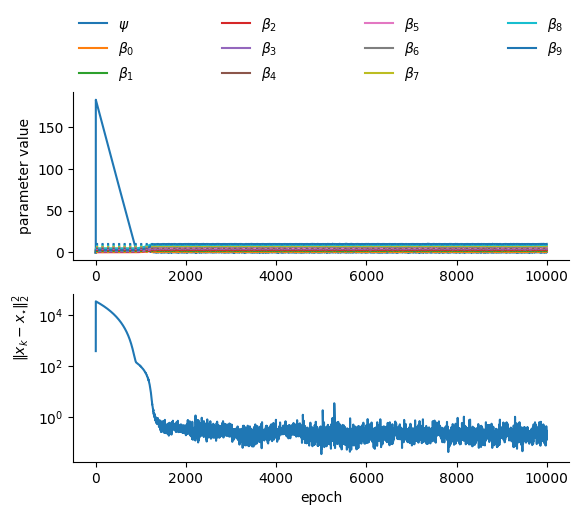

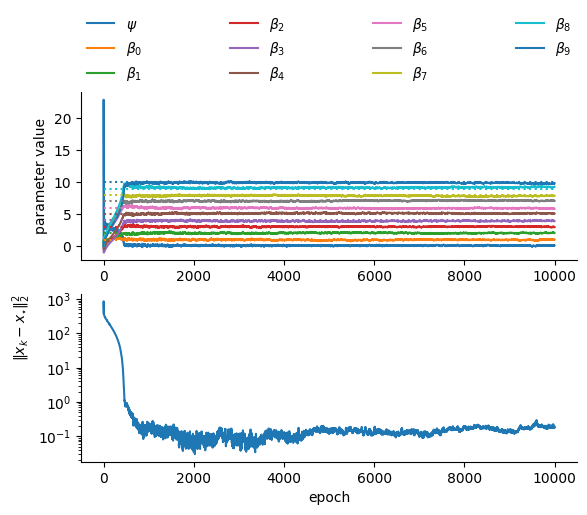

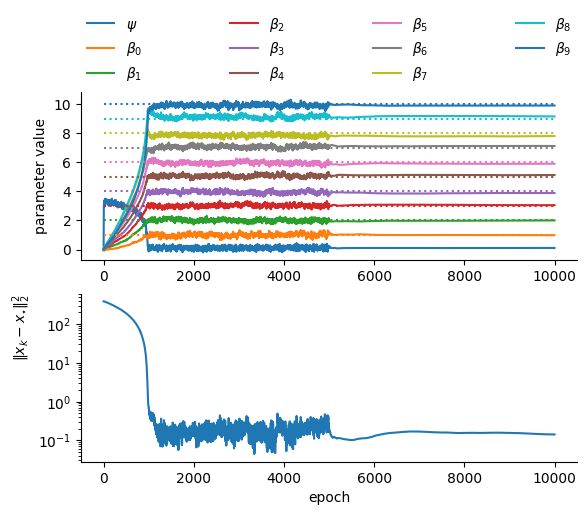

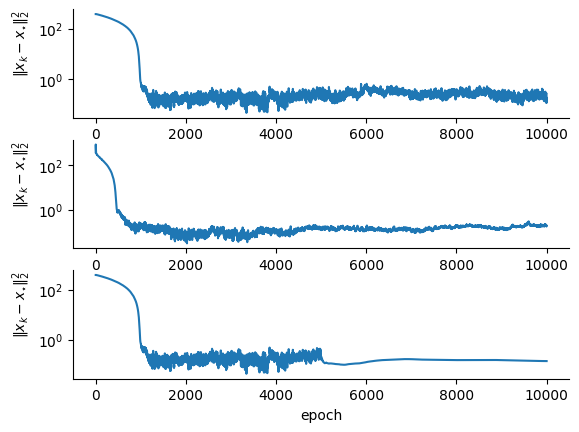

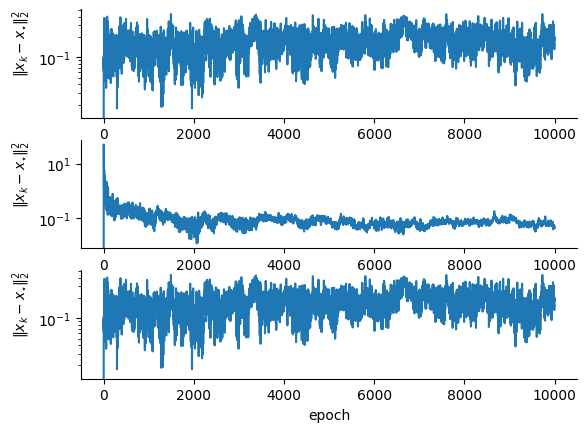

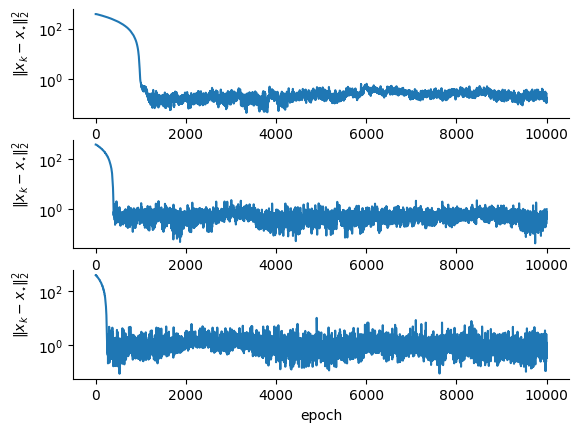

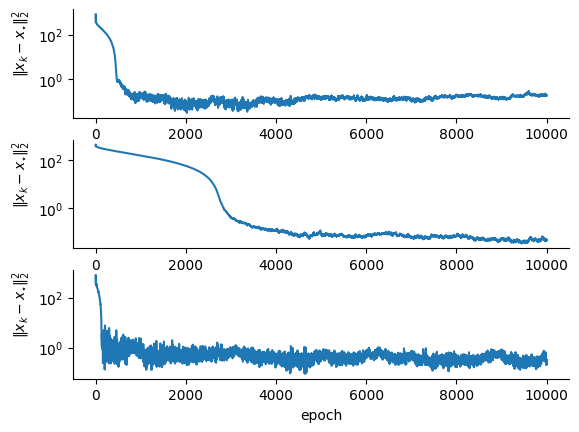

In [40]:
import numpy as np

from autograd import grad
import autograd.numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

def _robust_loss(psi, beta, nu, Y, Z):
    scaled_sq_errors = np.exp(-2*psi)  * (np.dot(Z, beta) - Y)**2
    if nu == np.inf:
        return scaled_sq_errors/2 + psi
    return (nu + 1)/2 * np.log(1 + scaled_sq_errors / nu) + psi


def make_sgd_robust_loss(Y, Z, nu):
    N = Y.size
    sgd_loss = lambda param, inds: np.mean(_robust_loss(param[0], param[1:], nu, Y[inds], Z[inds])) + np.sum(param**2)/(2*N)
    grad_sgd_loss = grad(sgd_loss)
    return sgd_loss, grad_sgd_loss


def generate_data(N, D, seed):
    rng = np.random.default_rng(seed)
    # generate multivariate t covariates with 10 degrees
    # of freedom and non-diagonal covariance 
    t_dof = 10
    locs = np.arange(D).reshape((D,1))
    cov = (t_dof - 2) / t_dof * np.exp(-(locs - locs.T)**2/4)
    Z = rng.multivariate_normal(np.zeros(D), cov, size=N)
    Z *= np.sqrt(t_dof / rng.chisquare(t_dof, size=(N, 1)))
    # generate responses using regression coefficients beta = (1, 2, ..., D)
    # and t-distributed noise 
    true_beta = np.arange(1, D+1)
    Y = Z.dot(true_beta) + rng.standard_t(t_dof, size=N)
    # for simplicity, center responses 
    Y = Y - np.mean(Y)
    return true_beta, Y, Z


def run_SGD(grad_loss, epochs, init_param, init_stepsize, stepsize_decayrate, batchsize, N):
    K = (epochs * N) // batchsize
    D = init_param.size
    paramiters = np.zeros((K+1,D))
    paramiters[0] = init_param
    for k in range(K):
        inds = np.random.choice(N, batchsize)
        stepsize = init_stepsize / (k+1)**stepsize_decayrate
        paramiters[k+1] = paramiters[k] - stepsize*grad_loss(paramiters[k], inds)
    return paramiters


def plot_iterates_and_squared_errors(paramiters, true_beta, opt_param, skip_epochs, epochs, N, batchsize, include_psi=True):
    D = true_beta.size
    param_names = [r'$\beta_{{{}}}$'.format(i) for i in range(D)]
    if include_psi:
        param_names = [r'$\psi$'] + param_names
    else:
        paramiters = paramiters[:,1:]
        opt_param = opt_param[1:]
    skip_epochs = 0
    skip_iters = int(skip_epochs*N//batchsize)
    xs = np.linspace(skip_epochs, epochs, paramiters.shape[0] - skip_iters)
    
    plt.subplot(2,1,1)
    plt.plot(xs, paramiters[skip_iters:])
    plt.plot(np.array(D*[[xs[0], xs[-1]]]).T, np.array([true_beta,true_beta]), ':')
    #plt.xlabel('epoch')
    plt.ylabel('parameter value')
    plt.legend(param_names, bbox_to_anchor=(0,1.02,1,0.2), loc='lower left',
               mode='expand', borderaxespad=0, ncol=4, frameon=False)
    sns.despine()

    plt.subplot(2,1,2)
    plt.plot(xs, np.linalg.norm(paramiters - opt_param[np.newaxis,:], axis=1)**2)
    plt.xlabel('epoch')
    plt.ylabel(r'$\|x_k - x_{\star}\|_2^2$',loc='top')
    plt.yscale('log')
    sns.despine()
    plt.show()
    
def plot_iterates_and_squared_errors2(paramiters1,paramiters2,paramiters3, true_beta, opt_param, skip_epochs, epochs, N, batchsize, include_psi=True):
    
    D = true_beta.size
    param_names = [r'$\beta_{{{}}}$'.format(i) for i in range(D)]
    if include_psi:
        param_names = [r'$\psi$'] + param_names
    else:
        paramiters1 = paramiters1[:,1:]
        paramiters2 = paramiters2[:,1:]
        paramiters3 = paramiters3[:,1:]
        
        opt_param = opt_param[1:]
    
    skip_epochs = 0
    skip_iters = int(skip_epochs*N//batchsize)
    xs = np.linspace(skip_epochs, epochs, paramiters1.shape[0] - skip_iters)
    
    plt.subplot(3,1,1)
    plt.plot(xs, np.linalg.norm(paramiters1 - opt_param[np.newaxis,:], axis=1)**2)
    plt.xlabel('epoch')
    plt.ylabel(r'$\|x_k - x_{\star}\|_2^2$',loc='top')
    plt.yscale('log')
    sns.despine()
    
    plt.subplot(3,1,2)
    plt.plot(xs, np.linalg.norm(paramiters2 - opt_param[np.newaxis,:], axis=1)**2)
    plt.xlabel('epoch')
    plt.ylabel(r'$\|x_k - x_{\star}\|_2^2$',loc='top')
    plt.yscale('log')
    sns.despine()
    
    plt.subplot(3,1,3)
    plt.plot(xs, np.linalg.norm(paramiters3- opt_param[np.newaxis,:], axis=1)**2)
    plt.xlabel('epoch')
    plt.ylabel(r'$\|x_k - x_{\star}\|_2^2$',loc='top')
    plt.yscale('log')
    sns.despine()
    
    plt.show()

def plot_iterates_and_squared_errors3(paramiters1,paramiters2,paramiters3, true_beta, opt_param, skip_epochs, epochs, N, batchsize, include_psi=True):
    
    D = true_beta.size
    param_names = [r'$\beta_{{{}}}$'.format(i) for i in range(D)]
    if include_psi:
        param_names = [r'$\psi$'] + param_names
    else:
        paramiters1 = paramiters1[:,1:]
        paramiters2 = paramiters2[:,1:]
        paramiters3 = paramiters3[:,1:]
        
        opt_param = opt_param[1:]
    
    skip_epochs = 0
    skip_iters = int(skip_epochs*N//batchsize)
    xs = np.linspace(skip_epochs, epochs, paramiters1.shape[0] - skip_iters)
    
    plt.subplot(2,1,1)
    plt.plot(xs, paramiters1[skip_iters:])
    plt.plot(np.array(D*[[xs[0], xs[-1]]]).T, np.array([true_beta,true_beta]), ':')
    plt.xlabel('epoch')
    plt.ylabel('parameter value')
    plt.legend(param_names, bbox_to_anchor=(0,1.02,1,0.2), loc='lower left',
               mode='expand', borderaxespad=0, ncol=4, frameon=False)
    sns.despine()

    plt.subplot(2,1,1)
    plt.plot(xs, paramiters2[skip_iters:])
    plt.plot(np.array(D*[[xs[0], xs[-1]]]).T, np.array([true_beta,true_beta]), ':')
    plt.xlabel('epoch')
    plt.ylabel('parameter value')
    plt.legend(param_names, bbox_to_anchor=(0,1.02,1,0.2), loc='lower left',
               mode='expand', borderaxespad=0, ncol=4, frameon=False)
    sns.despine()
    
    plt.subplot(2,1,1)
    plt.plot(xs, paramiters3[skip_iters:])
    plt.plot(np.array(D*[[xs[0], xs[-1]]]).T, np.array([true_beta,true_beta]), ':')
    plt.xlabel('epoch')
    plt.ylabel('parameter value')
    plt.legend(param_names, bbox_to_anchor=(0,1.02,1,0.2), loc='lower left',
               mode='expand', borderaxespad=0, ncol=4, frameon=False)
    sns.despine()
    
    plt.show()
    

    

# Model hyperparameters
batchsize = 10
epochs = 10
init_param = np.zeros(11)
init_param_2 = np.array([0,1,2,3,4,5,6,7,8,9,10])
N = 10000
D = 10
nu = 5
psi = 2


# true_beta = true regression coefficients
# Y = responses
# Z = covariates
seed = 10
true_beta, Y, Z = generate_data(N,D,seed)
opt_param = np.insert(true_beta,0,0,axis=0)

# Calculate loss and gradient of loss
sgd_loss, grad_sgd_loss = make_sgd_robust_loss(Y,Z,nu)


# === Experiment A -- Constant Step Size === 

init_stepsize = 0.2
init_stepsize_2 = 0.5
init_stepsize_3 = 0.8
stepsize_decayrate = 0
batchsize_2 = 50

paramiters_a = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize,stepsize_decayrate,batchsize,N)
paramiters_a_1= run_SGD(grad_sgd_loss,epochs,init_param_2,init_stepsize,stepsize_decayrate,batchsize,N)
paramiters_a_2 = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize_2,stepsize_decayrate,batchsize,N)
paramiters_a_3 = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize_3,stepsize_decayrate,batchsize,N)

paramiters_a_4  = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize,stepsize_decayrate,batchsize_2,N)

nu_2 = np.inf
sgd_loss_2, grad_sgd_loss_2 = make_sgd_robust_loss(Y,Z,nu_2)

paramiters_a_5 = run_SGD(grad_sgd_loss_2,epochs,init_param,init_stepsize,stepsize_decayrate,batchsize,N)
skip_epochs = 0
include_psi = True

# Plot iterates and squared errors
plot_iterates_and_squared_errors(paramiters_a,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)
plot_iterates_and_squared_errors(paramiters_a_5,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)

# == Experiment B -- Decreasing Step Size === 

init_stepsize = 5
stepsize_decayrate =0.51

init_stepsize_2 = 2
stepsize_decayrate_2 = 0.31

paramiters_b = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize,stepsize_decayrate,batchsize,N)
paramiters_b_1 = run_SGD(grad_sgd_loss,epochs,init_param_2,init_stepsize,stepsize_decayrate,batchsize,N)
paramiters_b_2 = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize_2,stepsize_decayrate,batchsize,N)
paramiters_b_3 = run_SGD(grad_sgd_loss,epochs,init_param,init_stepsize,stepsize_decayrate_2,batchsize,N)

skip_epochs = 0
include_psi = True

# Plot iterates and squared errors
plot_iterates_and_squared_errors(paramiters_b,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)


# == Experiment C -- 50% Iterate Averaging === 

init_stepsize = 0.2
stepsize_decayrate = 0

paramiters_c = paramiters_a
paramiters_c_1 = paramiters_a_1

skip_epochs = 0
include_psi = True

# iterate-averaged parameters

med = int(N/2)
paramiters_0 = paramiters_c[0:med]

paramiters_it = np.cumsum(paramiters_c[med:],axis=0)

for i in range(len(paramiters_it)):
    paramiters_it[i] = (1 / (i + 1) ) * paramiters_it[i]

paramiters_c = np.concatenate((paramiters_0,paramiters_it),axis=0)


# Plot iterates and squared errors
plot_iterates_and_squared_errors(paramiters_c,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)

# == Experiment D -- 3-way plot of Effect of Initialization

plot_iterates_and_squared_errors2(paramiters_a,paramiters_b,paramiters_c,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)
plot_iterates_and_squared_errors2(paramiters_a_1,paramiters_b_1,paramiters_c_1,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)


# == Experiment E -- Effects of varying step sizes

plot_iterates_and_squared_errors2(paramiters_a,paramiters_a_2,paramiters_a_3,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)
plot_iterates_and_squared_errors2(paramiters_b,paramiters_b_2,paramiters_b_3,true_beta,opt_param,skip_epochs,N,batchsize,include_psi)

